# Explorando rotacionar imagens e extrair canal azul do RGB

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from scipy.stats import mode
from skimage.io import imread
from skimage.feature import canny
from skimage.filters import threshold_otsu
from skimage.transform import hough_line, hough_line_peaks, rotate


In [2]:
def findTiltAngle(image_edges:np.ndarray) -> float:
  h, theta, d = hough_line(image_edges)
  accum, angles, dists = hough_line_peaks(h, theta, d)
  angle = np.rad2deg(mode(angles)[0][0])

  return angle + 90 if angle < 0 else angle - 90

def rgb_to_blue(img:np.ndarray):
  height, width, _ = img.shape
  blue_img = np.zeros(shape=(height, width))

  for i in range(height):
    for j in range(width):
      blue_img[i, j] = img[i, j, 2]
  
  return blue_img

In [3]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

<Figure size 432x288 with 0 Axes>

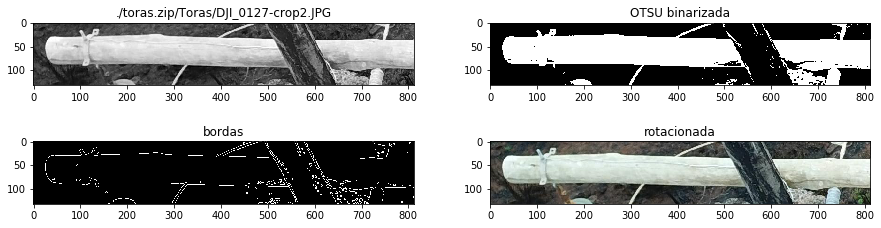

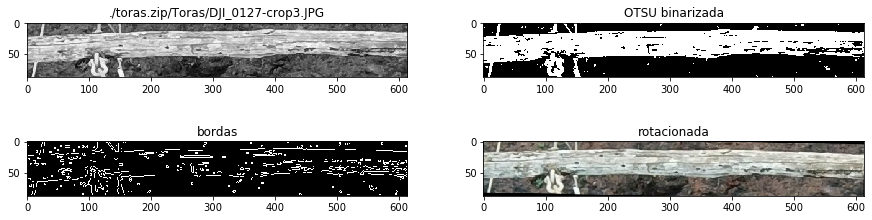

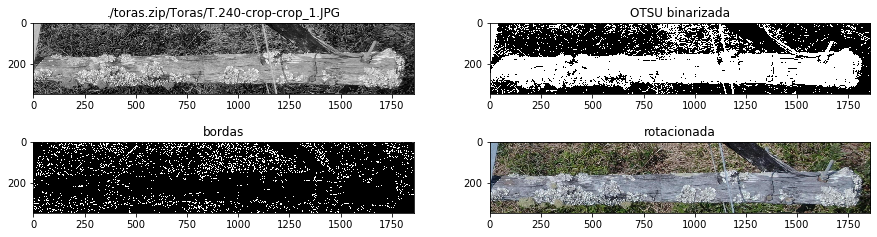

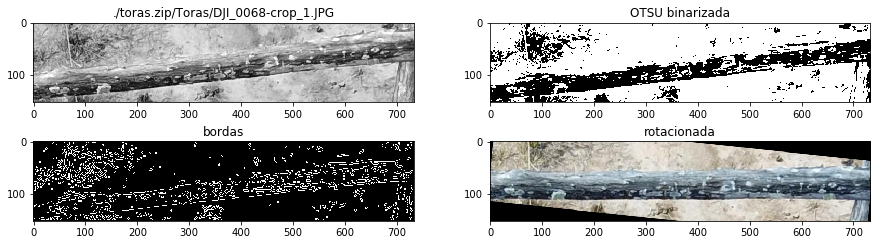

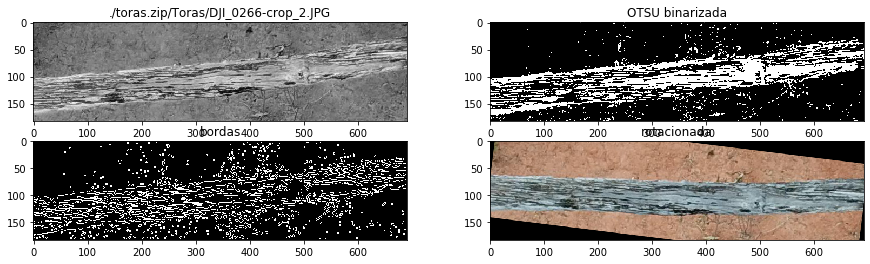

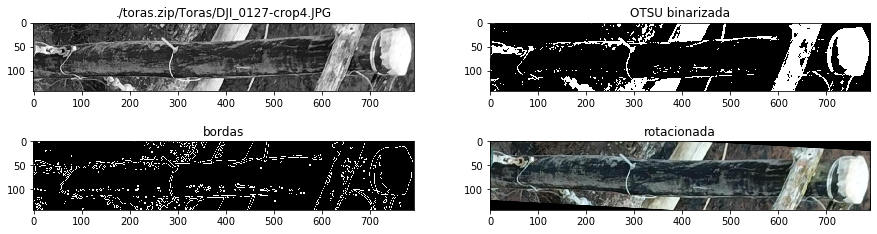

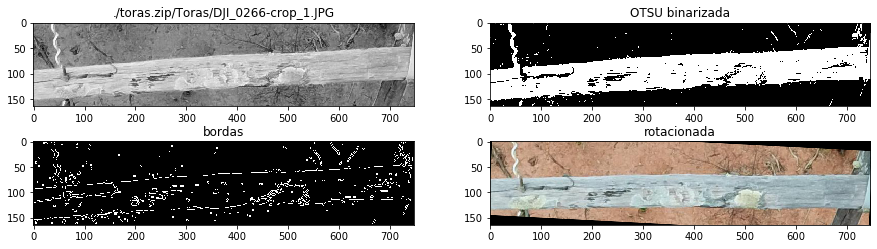

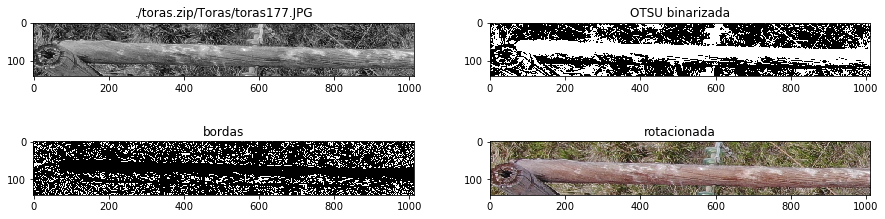

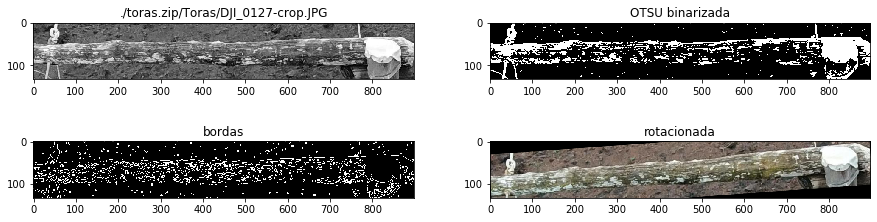

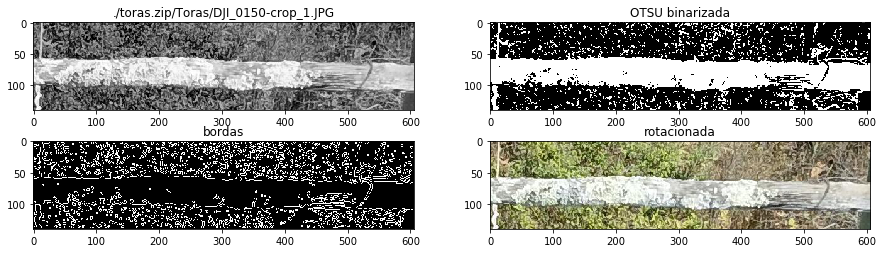

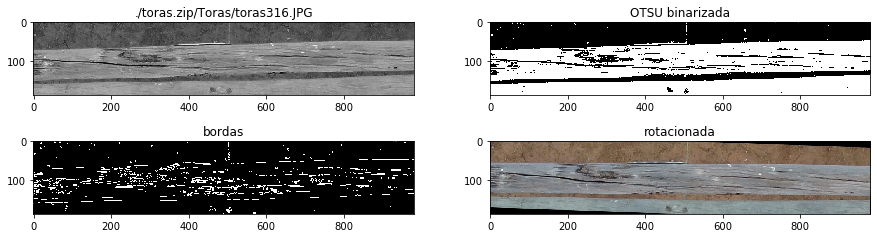

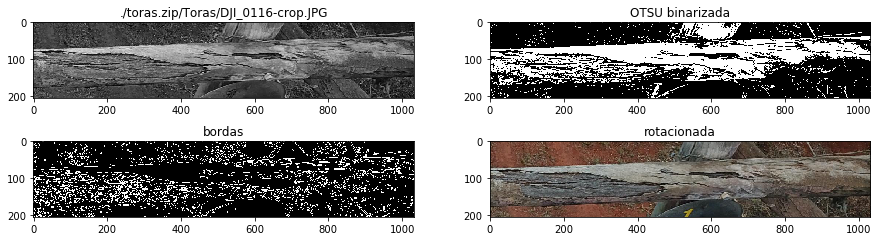

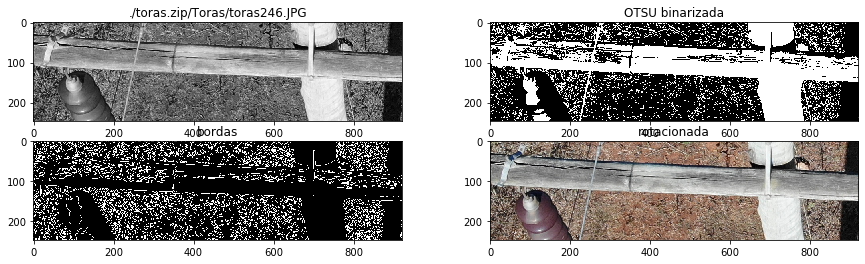

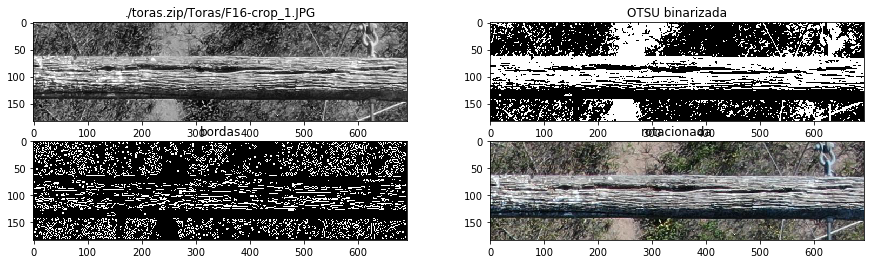

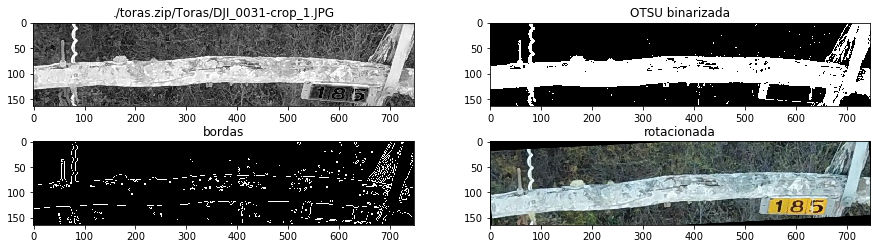

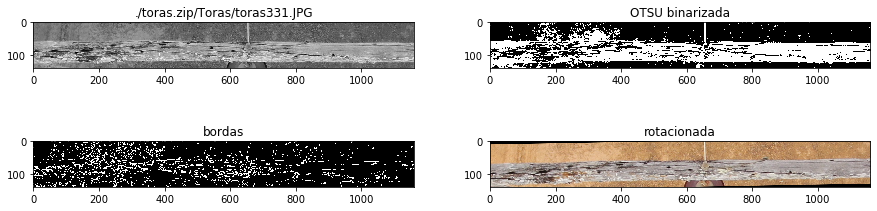

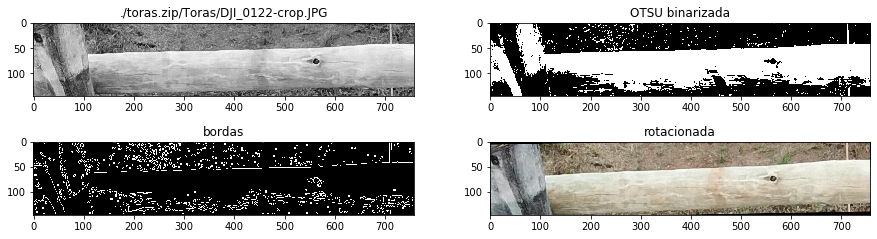

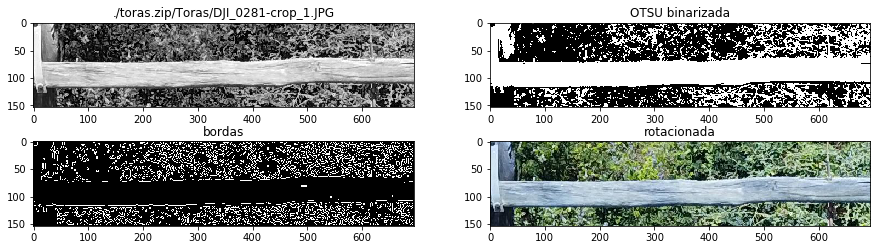

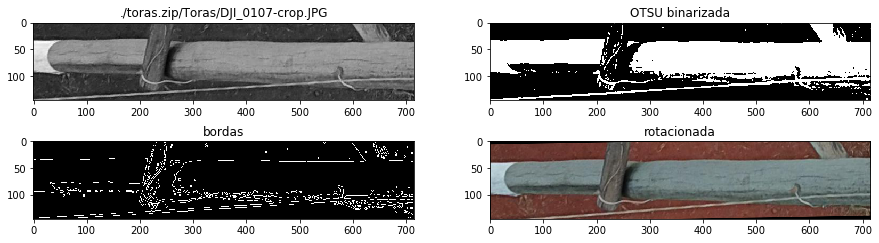

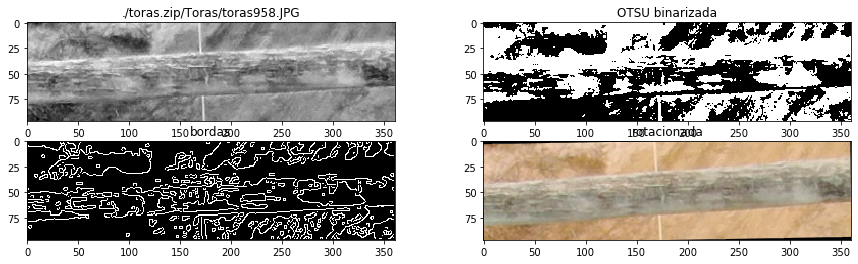

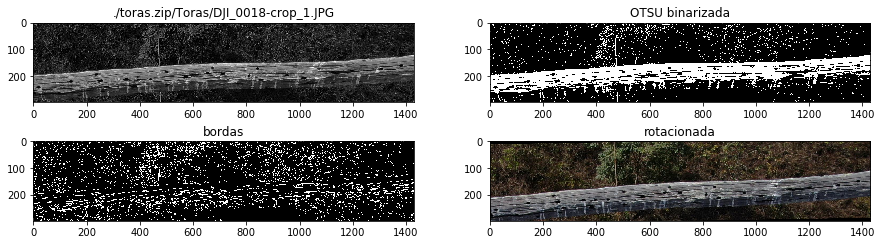

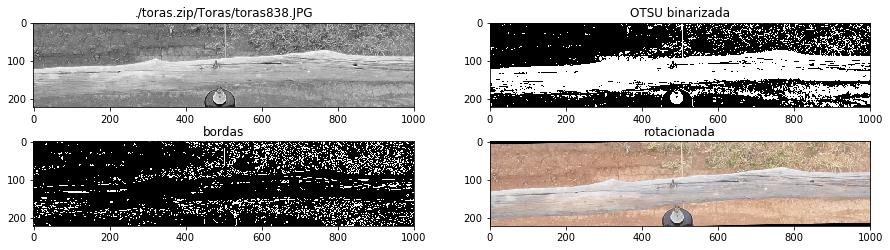

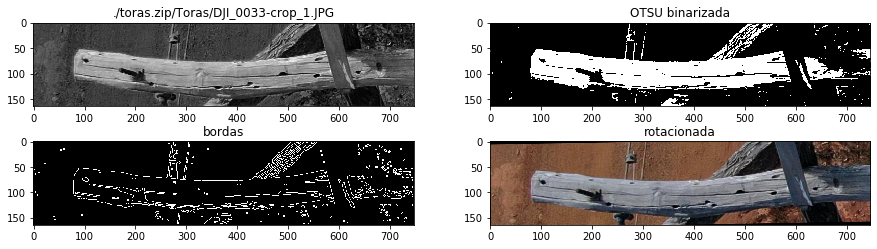

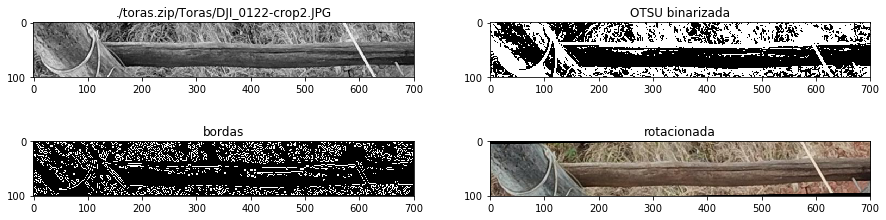

In [4]:
plt.gray()

for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # convertendo para o canal azul apenas
  blue_img = rgb_to_blue(img)

  # binarizando com otsu
  img_ostu = blue_img >= threshold_otsu(blue_img)

  # encontrando bordas
  edges = canny(img_ostu)

  # Rotacionando imagem
  angle = findTiltAngle(edges)
  new_img = rotate(imread(path), angle)

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 4))
  ax[0, 0].title.set_text(path)
  ax[0, 0].imshow(blue_img)

  ax[0, 1].title.set_text('OTSU binarizada')
  ax[0, 1].imshow(img_ostu)
  
  ax[1, 0].title.set_text('bordas')
  ax[1, 0].imshow(edges)
  
  ax[1, 1].title.set_text('rotacionada')
  ax[1, 1].imshow(new_img)
  
  plt.show()